In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Import Data

In [2]:
coc2010_21 = pd.read_excel('../../Data/2010_2021.xlsx')

In [3]:
coc2010_21

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633
2,3,8,11,0,2476,0,2487,0,0,1505,10
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394
...,...,...,...,...,...,...,...,...,...,...,...
105,3,0,0,2199,0,0,2199,0,0,0,0
106,4,35185,109512,91111,0,0,200623,0,0,0,0
107,7,5070,14790,5052,0,0,19842,0,0,0,0
108,6,33060,95353,141445,0,0,236798,0,0,0,0


In [4]:
coc2010_21.dropna

<bound method DataFrame.dropna of      2021  Family Units  Family Beds  Individual Beds  Adult Only Beds  \
0       1         57359       178740                0           214593   
1       2         44174       139345                0           165961   
2       3             8           11                0             2476   
3       4         13177        39384                0            46156   
4       5         84990       246910                0           350572   
..    ...           ...          ...              ...              ...   
105     3             0            0             2199                0   
106     4         35185       109512            91111                0   
107     7          5070        14790             5052                0   
108     6         33060        95353           141445                0   
109     9        106193       327605           353467                0   

     Child Only Beds  Total Yr Round Beds  Seasonal  Overflow/Voucher  \
0   

In [5]:
coc2010_21

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633
2,3,8,11,0,2476,0,2487,0,0,1505,10
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394
...,...,...,...,...,...,...,...,...,...,...,...
105,3,0,0,2199,0,0,2199,0,0,0,0
106,4,35185,109512,91111,0,0,200623,0,0,0,0
107,7,5070,14790,5052,0,0,19842,0,0,0,0
108,6,33060,95353,141445,0,0,236798,0,0,0,0


In [6]:
x = coc2010_21[['Adult Only Beds', 'Child Only Beds', 'Youth Beds', 'Family Beds', 'Family Units', 'Veteran Beds']]
y = coc2010_21['Total Yr Round Beds']

# Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(66, 6) (66,)
(44, 6) (44,)


In [9]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [10]:
predictions = lm.predict(x_test)
predictions

array([166747.0264146 ,  -4627.9559675 ,  -4293.34853557, 377546.95626459,
       206554.5834338 , 462445.00211128, 314074.75852499, 311491.83816068,
        -4627.9559675 ,  92116.26281675, 223292.96071419,  86508.44202629,
        -4151.48160965, 190689.14079591,  -4627.9559675 ,  45937.73805689,
       515498.44631036, 369223.28617776, 518118.20582618, 279566.19202986,
        -4627.9559675 ,   8489.88773546, 300712.17397167,  -4210.9092058 ,
       373621.05597162,  -4627.9559675 , 305987.60732839, 109354.38496201,
        -4627.9559675 , 246482.93569005, 761014.82800424, 277305.22086289,
        -4627.9559675 , 766248.5141482 , 289230.61912864, 641011.52068314,
        66392.31656018, 797519.76442451, 152685.95493293, 424255.73693769,
       300940.48789522, 422161.69276713, 301275.12907194, 447745.91615833])

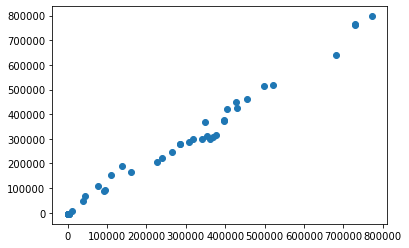

In [11]:
plt.scatter(y_test, predictions)

In [12]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9861973779623683


In [13]:
metrics.mean_absolute_error(y_test, predictions)

19658.974269860068

In [14]:
metrics.mean_squared_error(y_test, predictions)

688257992.3373863

In [15]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

26234.67156907794

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
kfold = KFold(10, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36
  37  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57
  59  60  61  62  63  64  66  67  68  70  71  72  73  74  75  76  77  78
  79  80  82  83  84  85  86  87  88  90  91  92  93  94  95  96  98  99
 100 102 103 104 105 106 107 108 109], test: [ 35  38  44  56  58  65  69  81  89  97 101]
train: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  43  44  45  46  47  48  49  50  51  52  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  89  91  92  94  95  97  98
  99 100 101 102 105 106 107 108 109], test: [  2  17  42  53  73  88  90  93  96 103 104]
train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  1

/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [18]:
print(cross_val_score(lm, x,y, cv=10))

[0.98934517 0.99134723 0.99329794 0.99211435 0.99250923 0.99436832
 0.99441121 0.98953651 0.99498111 0.88006825]


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [20]:
coc2010_21.head()

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633
2,3,8,11,0,2476,0,2487,0,0,1505,10
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394


In [21]:
coc2010_21.dropna

<bound method DataFrame.dropna of      2021  Family Units  Family Beds  Individual Beds  Adult Only Beds  \
0       1         57359       178740                0           214593   
1       2         44174       139345                0           165961   
2       3             8           11                0             2476   
3       4         13177        39384                0            46156   
4       5         84990       246910                0           350572   
..    ...           ...          ...              ...              ...   
105     3             0            0             2199                0   
106     4         35185       109512            91111                0   
107     7          5070        14790             5052                0   
108     6         33060        95353           141445                0   
109     9        106193       327605           353467                0   

     Child Only Beds  Total Yr Round Beds  Seasonal  Overflow/Voucher  \
0   

In [22]:
coc2010_21.head(10)

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633
2,3,8,11,0,2476,0,2487,0,0,1505,10
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394
5,6,43997,124471,0,252172,66,376709,0,0,104705,4909
6,7,31158,92984,0,44051,171,137206,0,0,16199,7493
7,8,9835,29455,0,24349,52,53856,0,0,1943,992
8,9,142349,425650,0,535165,3422,964237,20779,28253,141090,29550
9,2020,0,0,0,0,0,0,0,0,0,0


In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(coc2010_21)

KMeans(n_clusters=2)

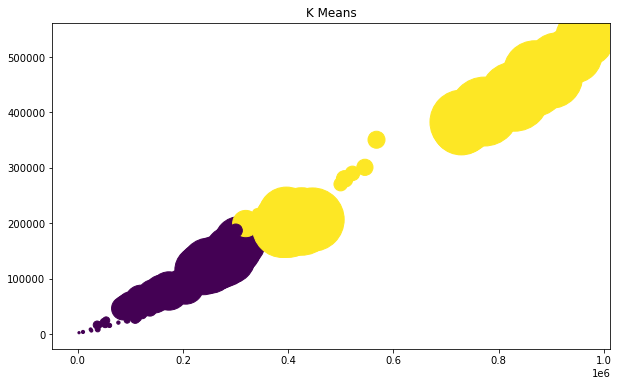

In [24]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(coc2010_21['Total Yr Round Beds'], coc2010_21['Adult Only Beds'], coc2010_21['Child Only Beds'], c=kmeans.labels_, cmap='viridis')

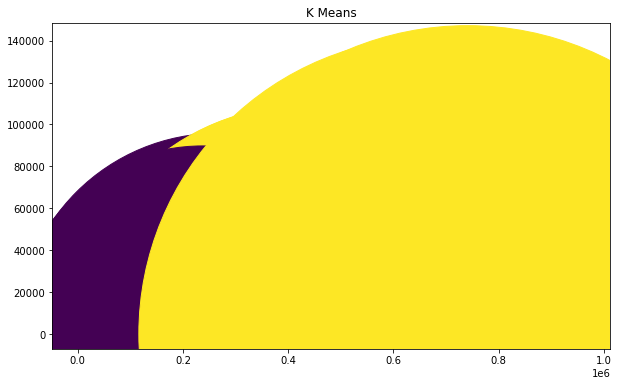

In [25]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(coc2010_21['Total Yr Round Beds'], coc2010_21['Veteran Beds'], coc2010_21['Individual Beds'], c=kmeans.labels_, cmap='viridis')

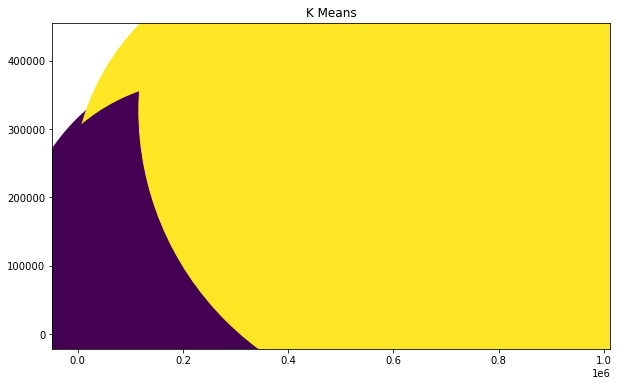

In [26]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(coc2010_21['Total Yr Round Beds'], coc2010_21['Family Beds'], coc2010_21['Individual Beds'], c=kmeans.labels_, cmap='viridis')

In [27]:
coc2010_21['Group'] = kmeans.labels_

In [29]:
coc2010_21.head()

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds,Group
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156,1
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633,0
2,3,8,11,0,2476,0,2487,0,0,1505,10,0
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513,0
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394,1


In [30]:
coc2010_21.groupby('Group')['Total Yr Round Beds'].mean()

Group
0    105223.464789
1    544717.794872
Name: Total Yr Round Beds, dtype: float64

In [31]:
coc2010_21.groupby('Group')['Adult Only Beds'].mean()

Group
0     40617.211268
1    264405.641026
Name: Adult Only Beds, dtype: float64

In [32]:
coc2010_21.groupby('Group')['Child Only Beds'].mean()

Group
0     538.042254
1    2052.256410
Name: Child Only Beds, dtype: float64

In [33]:
coc2010_21.groupby('Group')['Family Beds'].mean()

Group
0     53736.112676
1    250557.897436
Name: Family Beds, dtype: float64

In [34]:
coc2010_21.groupby('Group')['Individual Beds'].mean()

Group
0    10334.633803
1    29471.230769
Name: Individual Beds, dtype: float64

In [35]:
coc2010_21.groupby('Group')['Veteran Beds'].mean()

Group
0     4855.746479
1    69784.974359
Name: Veteran Beds, dtype: float64

In [36]:
kmeans.cluster_centers_

array([[3.16112676e+02, 1.72541408e+04, 5.37361127e+04, 1.03346338e+04,
        4.06172113e+04, 5.38042254e+02, 1.05223465e+05, 3.50408451e+03,
        3.96808451e+03, 4.85574648e+03, 2.08311268e+03],
       [5.17948718e+00, 8.18997436e+04, 2.50557897e+05, 2.94712308e+04,
        2.64405641e+05, 2.05225641e+03, 5.44717795e+05, 1.27584615e+04,
        1.44478974e+04, 6.97849744e+04, 9.79489744e+03]])

In [37]:
kmeans.inertia_

4530001449577.461

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
coc2010_21.head()

,2021,Family Units,Family Beds,Individual Beds,Adult Only Beds,Child Only Beds,Total Yr Round Beds,Seasonal,Overflow/Voucher,Veteran Beds,Youth Beds,Group
0,1,57359,178740,0,214593,3133,396466,20779,28253,18243,16156,1
1,2,44174,139345,0,165961,2602,307908,20779,28253,4356,6633,0
2,3,8,11,0,2476,0,2487,0,0,1505,10,0
3,4,13177,39384,0,46156,531,86071,0,0,12382,9513,0
4,5,84990,246910,0,350572,289,567771,0,0,122847,13394,1


In [40]:
x = coc2010_21.drop('Total Yr Round Beds', axis=1)
y = coc2010_21['Total Yr Round Beds']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [42]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [43]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,treePredictions))
print(classification_report(y_test,treePredictions))

[[4 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
        2129       0.00      0.00      0.00         1
        2191       0.00      0.00      0.00         0
        2266       0.00      0.00      0.00         0
        2390       0.00      0.00      0.00         1
       36790       0.00      0.00      0.00         1
       39854       0.00      0.00      0.00         0
       52102       0.00      0.00      0.00         1
       53856       0.00      0.00      0.00         0
       60312       0.00      0.00      0.00         1
       86071       0.00      0.00      0.00         0
       92258       0.00      0.00      0.00         1
       95446       0.00      0.00      0.00         1
      101029       0.00      0.00      0.00         0
      109095       0.00      0.00      0.00         0
      112961   

/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/an

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
x = coc2010_21.drop('Total Yr Round Beds', axis=1)
y = coc2010_21['Total Yr Round Beds']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [47]:
forest = RandomForestClassifier(n_estimators=10, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=76)

In [48]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
        1907       0.00      0.00      0.00         0
        2129       0.00      0.00      0.00         1
        2191       0.00      0.00      0.00         0
        2390       0.00      0.00      0.00         1
       36790       0.00      0.00      0.00         1
       49877       0.00      0.00      0.00         0
       52102       0.00      0.00      0.00         1
       53856       0.00      0.00      0.00         0
       60312       0.00      0.00      0.00         1
       77141       0.00      0.00      0.00         0
       92258       0.00      0.00      0.00         1
       95446       0.00      0.00      0.00         1
      101029       0.00      0.00      0.00         0
      109095       0.00      0.00      0.00         0
      122815   

/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/an